## Ejercicio Time Series Forecast
Para este ejercicio vamos a predecir cuál será la demanda de pasajeros de una aerolinea, para poder anticiparse a las contrataciones de personal, mantenimiento de las aeronaves y gestión de inventario y comidas.

Para ello, se pide:
1. Carga datos (AirPassengers.csv) y representa la serie. ¿Hay seasonality? ¿Cada cuanto?
2. Crea en una gráfica la variable original + su media obtenida mediante una rolling window con el valor de seasonality obtenido en el apartado anterior. Tienes que usar la función rolling() del DataFrame.
3. Comprueba de manera estadística si la serie es o no stationary.
4. Aplica una transformación logarítmica sobre los datos para mejorar el proceso de transformación de tu time series a stationary. Acuérdate después del forecast de invertir la transformación.
5. Divide en train y test. Guarda 20 muestras para test.
6. Crea tu primer modelo ARIMA. Habrá varias combinaciones en función de sus hiperparámetros... Mide el MAE y RMSE del modelo en predicción. Ten en cuenta el parámetro "m" de la función ARIMA, mediante el cual se establece el seasonality.
7. Representa en una gráfica los datos de test y tus predicciones.
8. Prueba un decission tree y un random forest, a ver qué performance presentan.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. Carga datos y representa la serie

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [4]:
df.head(20)

,value
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


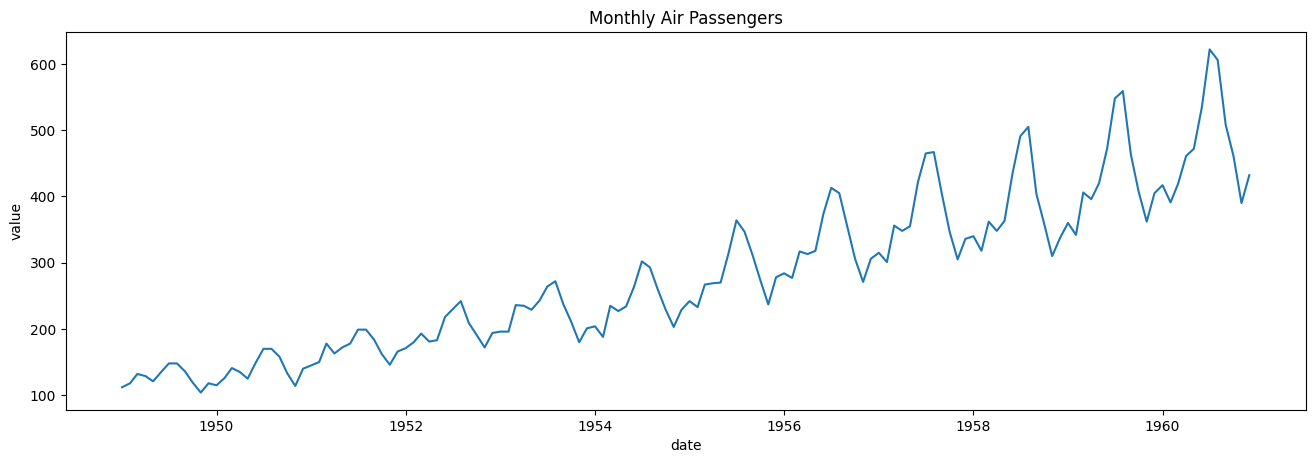

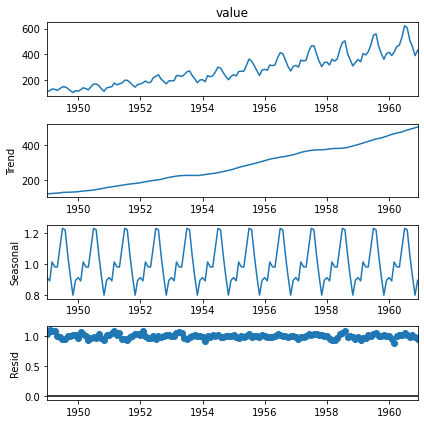

In [12]:
# descomponemos la serie para observar la tendencia, seasonality y residuos
# encontramos seasonality cada año




<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

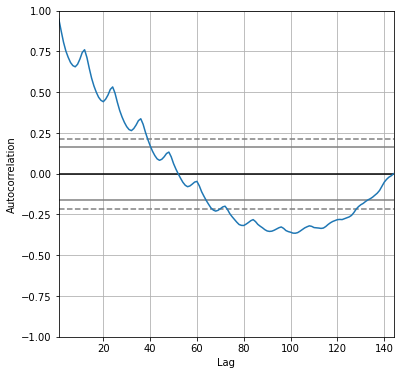

In [13]:
# pintamos autocorrelación


## 2. Crea en una gráfica la variable original + su media obtenida mediante una rolling window con el valor de seasonality obtenido en el apartado anterior

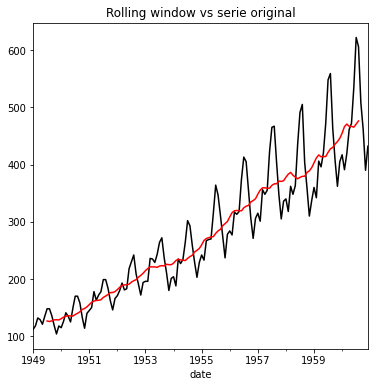

In [14]:
s = 12 # annual seasonality

# MA moving average


## 3. Comprueba de manera estadística si la serie es o no stationary.

In [15]:
# test de Dicker-Fuller



ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


## 4. Aplica una transformación logarítmica

ADF Statistic: -1.717017
p-value: 0.422367
	1%: -3.482
	5%: -2.884
	10%: -2.579


1.0

2.0

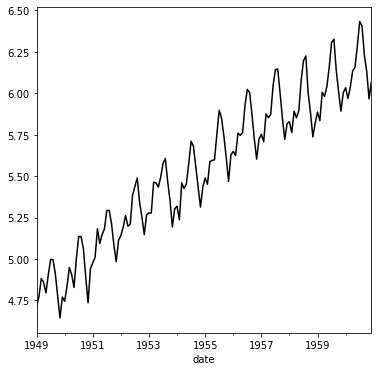

In [21]:
# Observamos que la varianza está más estabilizada


## 5. Divide en train y test. Guarda 20 muestras para test.

## 6. Crea tu primer modelo ARIMA

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-211.160, Time=5.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-203.811, Time=1.35 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-205.275, Time=3.93 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-206.552, Time=4.36 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-204.531, Time=7.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=10.48 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=8.48 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=5.18 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-206.463, Time=2.68 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-228.438, Time=7.79 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-232.457, Time=10.27 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-231.805, Time=9.56 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-236.633, Time=11.92 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-216.484, Time=6.25 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-23

## 7. Representa en una gráfica los datos de test y tus predicciones.

In [24]:
'''
Ahora probamos con stationary de m=12
'''



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=-414.009, Time=19.89 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-294.133, Time=0.45 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-403.899, Time=17.11 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-357.432, Time=8.72 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-126.477, Time=0.23 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=-415.946, Time=7.35 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=-388.347, Time=2.41 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=-413.742, Time=32.38 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=-409.560, Time=11.30 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=-412.371, Time=44.39 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=-412.579, Time=5.00 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=-415.213, Time=7.44 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-414.399, Time=9.72 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=-304.397, Time=1.91 sec
 ARIMA(0,0,2)(

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  125
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 213.390
Date:                              Fri, 04 Mar 2022   AIC                           -416.779
Time:                                      12:57:50   BIC                           -403.142
Sample:                                           0   HQIC                          -411.246
                                              - 125                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0196      0.010      2.031      0.042       0.001       0.038
ar.L1          0.6069      0.086      7.093      0.000       0.439       0.775
ar.L2          0.2333      0.089      2.607      0.009       0.058       0.409
ma.S.L12      -0.5599      0.116     -4.818      0.000      -0.788      -0.332
sigma2         0.0013      0.000      7.775      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.01
Prob(Q):                              0.98   Prob(JB):                         0.08
Heteroskedasticity (H):               0.41   Skew:                             0.08
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

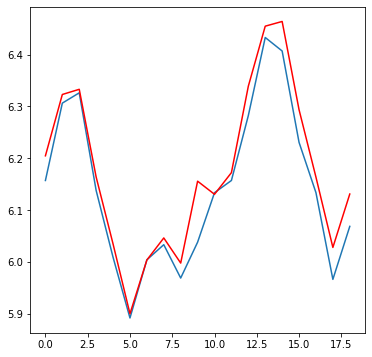

## 8. Prueba otros modelos, a ver qué performance presentan.

In [28]:
df.head()

,value,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
date,,,,,,,,,,,,,
1950-01-01,4.744932,4.718499,4.770685,4.882802,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685
1950-02-01,4.836282,4.770685,4.882802,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932
1950-03-01,4.948760,4.882802,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932,4.836282
1950-04-01,4.905275,4.859812,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932,4.836282,4.948760
1950-05-01,4.828314,4.795791,4.905275,4.997212,4.997212,4.912655,4.779123,4.644391,4.770685,4.744932,4.836282,4.948760,4.905275


Shape X_train: (113, 12)
Shape X_test: (19, 12)
Shape y_train: (113,)
Shape y_test: (19,)


In [31]:
df.head()

,value,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
date,,,,,,,,,,,,,
1951-01-01,4.976734,4.744932,4.836282,4.948760,4.905275,4.828314,5.003946,5.135798,5.135798,5.062595,4.890349,4.736198,4.941642
1951-02-01,5.010635,4.836282,4.948760,4.905275,4.828314,5.003946,5.135798,5.135798,5.062595,4.890349,4.736198,4.941642,4.976734
1951-03-01,5.181784,4.948760,4.905275,4.828314,5.003946,5.135798,5.135798,5.062595,4.890349,4.736198,4.941642,4.976734,5.010635
1951-04-01,5.093750,4.905275,4.828314,5.003946,5.135798,5.135798,5.062595,4.890349,4.736198,4.941642,4.976734,5.010635,5.181784
1951-05-01,5.147494,4.828314,5.003946,5.135798,5.135798,5.062595,4.890349,4.736198,4.941642,4.976734,5.010635,5.181784,5.093750


Shape X_train: (113, 12)
Shape X_test: (7, 12)
Shape y_train: (113,)
Shape y_test: (7,)


MSE: 0.004251991796624739
RMSE: 0.06520729864535671
MAE: 0.04233357044647855
